In [1]:
import numpy as np
import pandas as pd
from itertools import product

In [2]:
new_data=pd.read_csv('new_data.csv')
new_data.head()

,shop_id,item_id,date_block_num,median_price,item_cnt_month,City,Type,item_category_id,main_cat,month,lag_median_price,lag_item_cnt_month,lag_shop_sales,lag_item_sales
0,0,12,1,0.0,0.0,0,0,55,2,2,0.0,0.0,5578.0,0.0
1,0,19,0,0.0,0.0,0,0,40,0,1,0.0,0.0,0.0,0.0
2,0,27,0,0.0,0.0,0,0,19,1,1,0.0,0.0,0.0,0.0
3,0,27,1,0.0,0.0,0,0,19,1,2,0.0,0.0,5578.0,7.0
4,0,28,0,0.0,0.0,0,0,30,1,1,0.0,0.0,0.0,0.0


In [3]:
#Need to Calculate sales of last month for each shop_id and item_id combination
# index_cols=['shop_id','item_id','date_block_num']
# all_shops=new_data.shop_id.drop_duplicates()
# all_items=new_data.item_id.drop_duplicates()
# all_dates=new_data.date_block_num.drop_duplicates()
# grid=np.array(list(product(*[all_shops,all_items,all_dates])),dtype='int32')
# prev_sales=pd.DataFrame(np.vstack(grid),columns=index_cols,dtype=int32)
# prev_sales.to_csv('prev_sales.csv',index_label=False)

In [4]:
#The last price the prodcut was sold on
new_data['lag_median_price']=new_data.groupby(['shop_id','item_id'])['median_price'].shift()
new_data['lag_item_cnt_month']=new_data.groupby(['shop_id','item_id'])['item_cnt_month'].shift()
new_data.tail(10)


,shop_id,item_id,date_block_num,median_price,item_cnt_month,City,Type,item_category_id,main_cat,month,lag_median_price,lag_item_cnt_month,lag_shop_sales,lag_item_sales
10913840,59,22167,29,0.0,0.0,24,5,49,3,6,0.0,0.0,916.0,31.0
10913841,59,22167,30,0.0,0.0,24,5,49,3,7,0.0,0.0,913.0,33.0
10913842,59,22167,31,0.0,0.0,24,5,49,3,8,0.0,0.0,992.0,34.0
10913843,59,22167,32,0.0,0.0,24,5,49,3,9,0.0,0.0,1214.0,29.0
10913844,59,22167,33,0.0,0.0,24,5,49,3,10,0.0,0.0,914.0,21.0
10913845,59,22168,0,0.0,0.0,24,5,62,5,1,NaN,NaN,0.0,0.0
10913846,59,22168,1,0.0,0.0,24,5,62,5,2,0.0,0.0,2017.0,2.0
10913847,59,22168,2,0.0,0.0,24,5,62,5,3,0.0,0.0,1897.0,2.0
10913848,59,22168,8,0.0,0.0,24,5,62,5,9,0.0,0.0,2048.0,0.0
10913849,59,22169,14,0.0,0.0,24,5,69,5,3,NaN,NaN,1420.0,0.0


In [5]:
cols=['shop_id','date_block_num']
all_shops=new_data.shop_id.unique()
all_dates=new_data.date_block_num.unique()
shop_sales=pd.DataFrame(np.vstack(np.array(list(product(*[all_shops,all_dates])),dtype='int32')),columns=cols,dtype=np.int32)
shop_sales=shop_sales.merge(new_data[['shop_id','date_block_num','item_cnt_month']],on=cols,how='left').sort_values(cols)
shop_sales=shop_sales.groupby(cols).item_cnt_month.sum().reset_index()
shop_sales['lag_shop_sales']=shop_sales.groupby('shop_id').item_cnt_month.shift(1)
shop_sales.drop('item_cnt_month',axis=1,inplace=True)
new_data=new_data.merge(shop_sales,on=cols,how='left')
new_data.head()

,shop_id,item_id,date_block_num,median_price,item_cnt_month,City,Type,item_category_id,main_cat,month,lag_median_price,lag_item_cnt_month,lag_shop_sales_x,lag_item_sales,lag_shop_sales_y
0,0,12,1,0.0,0.0,0,0,55,2,2,NaN,NaN,5578.0,0.0,5578.0
1,0,19,0,0.0,0.0,0,0,40,0,1,NaN,NaN,0.0,0.0,NaN
2,0,27,0,0.0,0.0,0,0,19,1,1,NaN,NaN,0.0,0.0,NaN
3,0,27,1,0.0,0.0,0,0,19,1,2,0.0,0.0,5578.0,7.0,5578.0
4,0,28,0,0.0,0.0,0,0,30,1,1,NaN,NaN,0.0,0.0,NaN


In [6]:
cols=['item_id','date_block_num']
all_items=new_data.item_id.unique()
all_dates=new_data.date_block_num.unique()
item_sales=pd.DataFrame(np.vstack(np.array(list(product(*[all_items,all_dates])),dtype='int32')),columns=cols,dtype=np.int32)
item_sales=item_sales.merge(new_data[['item_id','date_block_num','item_cnt_month']],on=cols,how='left').sort_values(cols)  

In [7]:
item_sales=item_sales.groupby(cols).item_cnt_month.sum().reset_index()
item_sales['lag_item_sales']=item_sales.groupby('item_id').item_cnt_month.shift(1)
item_sales.drop('item_cnt_month',axis=1,inplace=True)

In [8]:
new_data=new_data.merge(item_sales,on=cols,how='left')
new_data.head()

,shop_id,item_id,date_block_num,median_price,item_cnt_month,City,Type,item_category_id,main_cat,month,lag_median_price,lag_item_cnt_month,lag_shop_sales_x,lag_item_sales_x,lag_shop_sales_y,lag_item_sales_y
0,0,12,1,0.0,0.0,0,0,55,2,2,NaN,NaN,5578.0,0.0,5578.0,0.0
1,0,19,0,0.0,0.0,0,0,40,0,1,NaN,NaN,0.0,0.0,NaN,NaN
2,0,27,0,0.0,0.0,0,0,19,1,1,NaN,NaN,0.0,0.0,NaN,NaN
3,0,27,1,0.0,0.0,0,0,19,1,2,0.0,0.0,5578.0,7.0,5578.0,7.0
4,0,28,0,0.0,0.0,0,0,30,1,1,NaN,NaN,0.0,0.0,NaN,NaN


In [9]:
new_data=new_data.fillna(0)

In [10]:
new_data

,shop_id,item_id,date_block_num,median_price,item_cnt_month,City,Type,item_category_id,main_cat,month,lag_median_price,lag_item_cnt_month,lag_shop_sales_x,lag_item_sales_x,lag_shop_sales_y,lag_item_sales_y
0,0,12,1,0.0,0.0,0,0,55,2,2,0.0,0.0,5578.0,0.0,5578.0,0.0
1,0,19,0,0.0,0.0,0,0,40,0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,0,27,0,0.0,0.0,0,0,19,1,1,0.0,0.0,0.0,0.0,0.0,0.0
3,0,27,1,0.0,0.0,0,0,19,1,2,0.0,0.0,5578.0,7.0,5578.0,7.0
4,0,28,0,0.0,0.0,0,0,30,1,1,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10913845,59,22168,0,0.0,0.0,24,5,62,5,1,0.0,0.0,0.0,0.0,0.0,0.0
10913846,59,22168,1,0.0,0.0,24,5,62,5,2,0.0,0.0,2017.0,2.0,2017.0,2.0
10913847,59,22168,2,0.0,0.0,24,5,62,5,3,0.0,0.0,1897.0,2.0,1897.0,2.0
10913848,59,22168,8,0.0,0.0,24,5,62,5,9,0.0,0.0,2048.0,0.0,2048.0,0.0


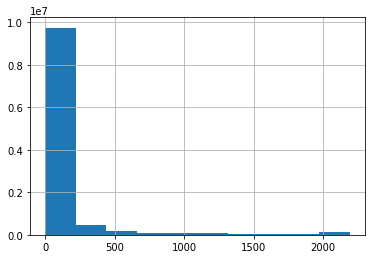

In [11]:
lb,ub = np.percentile(new_data.median_price,(1,99))
new_data['median_price']=np.clip(new_data.median_price,lb,ub)
new_data.median_price.hist()

In [12]:
val_filter = (new_data.date_block_num >= 33)
X_train = new_data[~val_filter].drop('item_cnt_month',axis=1)
X_val = new_data[val_filter].drop('item_cnt_month',axis=1)
y_train = new_data[~val_filter]['item_cnt_month']
y_val = new_data[val_filter]['item_cnt_month']
y_train=np.clip(y_train,0,20)
y_val=np.clip(y_val,0,20)

In [13]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [14]:
y_pred=rf.predict(X_val)

In [15]:
from sklearn.metrics import mean_squared_error
y_pred=np.clip(y_pred,0,20)
mean_squared_error(y_val,y_pred,squared=False)

0.755164081953245

In [22]:
pd.DataFrame([X_val.columns,rf.feature_importances_]).T.sort_values(1,ascending=False)

,0,1
3,median_price,0.393627
10,lag_item_cnt_month,0.198763
1,item_id,0.0970064
6,item_category_id,0.0440666
13,lag_shop_sales_y,0.0331559
11,lag_shop_sales_x,0.0329274
12,lag_item_sales_x,0.032378
14,lag_item_sales_y,0.0312046
2,date_block_num,0.027674
0,shop_id,0.0256473


In [16]:
# import xgboost as xgb
# xg_reg = xgb.XGBRegressor(n_jobs=-1)
# xg_reg.fit(X_train,y_train)
# y_xg_pred=xg_reg.predict(X_val)
# y_xg_pred=np.clip(y_xg_pred,0,20)
# mean_squared_error(y_val,y_xg_pred,squared=False)

In [17]:
# scores=[mean_squared_error(y_val,y_pred,squared=False),mean_squared_error(y_val,y_xg_pred,squared=False)]
# df = pd.DataFrame(scores, columns=["score"])
# df.to_csv('rf/xg_reg scores.csv', index=False)